In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

ERROR! Session/line number was not unique in database. History logging moved to new session 501


In [40]:
%matplotlib inline

In [41]:
import seaborn as sns

In [42]:
data_file = '../data/moving_violations.csv'

In [43]:
df = pd.read_csv(data_file)
df['ticketissuedate'] = pd.to_datetime(df.ticketissuedate)
df['totalpaid'] = df.totalpaid.fillna(0)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993673 entries, 0 to 3993672
Data columns (total 20 columns):
accidentindicator    object
address_id           float64
agencyid             float64
fineamt              float64
location             object
objectid             int64
penalty1             float64
penalty2             float64
row_                 int64
streetsegid          float64
ticketissuedate      datetime64[ns]
tickettype           object
totalpaid            float64
violationcode        object
violationdesc        object
xcoord               float64
y                    float64
ycoord               float64
filename             object
﻿x                   float64
dtypes: datetime64[ns](1), float64(11), int64(2), object(6)
memory usage: 609.4+ MB


In [9]:
df.groupby('accidentindicator').totalpaid.mean()

accidentindicator
No     94.883731
Yes    50.499074
Name: totalpaid, dtype: float64

In [10]:
df.groupby(['accidentindicator', 'tickettype' ]).totalpaid.mean()

accidentindicator  tickettype    
No                 Mover Void         0.147887
                   Moving            63.071702
                   No Ticket Type    36.336931
                   Parker Void        0.000000
                   Parking            1.724138
                   Photo             97.735412
Yes                Mover Void         0.000000
                   Moving            50.913755
                   No Ticket Type    27.017391
Name: totalpaid, dtype: float64

In [11]:
df['tickettype'] = df.tickettype.fillna('')

In [21]:
df.columns

Index([u'accidentindicator', u'address_id', u'agencyid', u'fineamt',
       u'location', u'objectid', u'penalty1', u'penalty2', u'row_',
       u'streetsegid', u'ticketissuedate', u'tickettype', u'totalpaid',
       u'violationcode', u'violationdesc', u'xcoord', u'y', u'ycoord',
       u'filename', u'﻿x'],
      dtype='object')

In [12]:
voided_df = df[df.tickettype.str.contains('Void')]
voided = None

In [13]:
voided_df = voided_df.groupby(['accidentindicator', 'violationcode']).count().reset_index()

In [14]:
voided_df['count'] = voided_df.address_id

In [15]:
t_df = voided_df[['accidentindicator', 'violationcode', 'count']]

In [16]:
# t_df.sort_values('count', ascending=False)

In [17]:
sns.set_style("whitegrid")

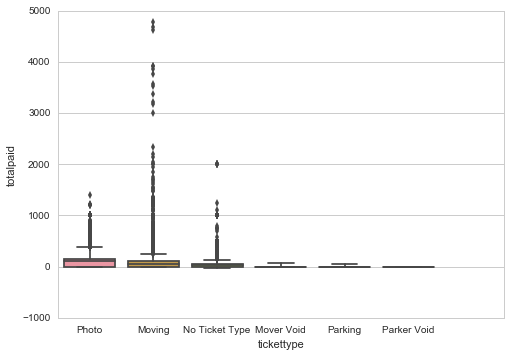

In [19]:
sns.boxplot(x="tickettype", y="totalpaid", data=df)

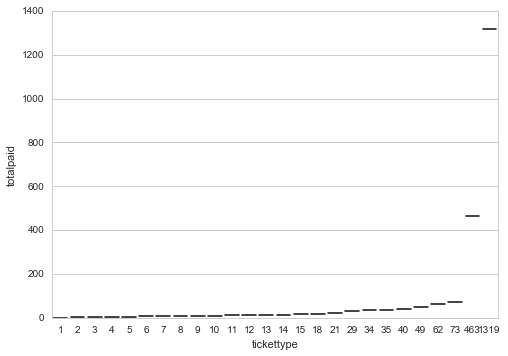

In [20]:
sns.boxplot(x="tickettype", y="totalpaid", data=voided_df)

In [29]:
ts = pd.Series(df.totalpaid, index=df.ticketissuedate)


In [30]:
ts = ts.cumsum()

In [45]:
len(df)

3993673

In [44]:
df.sample(100000).to_csv('moving_violations_sample_large.csv', sep='\t', index=False)